# Hospital Readmissions Data Analysis and Recommendations for Reduction

### Background
In October 2012, the US government's Center for Medicare and Medicaid Services (CMS) began reducing Medicare payments for Inpatient Prospective Payment System hospitals with excess readmissions. Excess readmissions are measured by a ratio, by dividing a hospital’s number of “predicted” 30-day readmissions for heart attack, heart failure, and pneumonia by the number that would be “expected,” based on an average hospital with similar patients. A ratio greater than 1 indicates excess readmissions.

### Exercise Directions

In this exercise, you will:
+ critique a preliminary analysis of readmissions data and recommendations (provided below) for reducing the readmissions rate
+ construct a statistically sound analysis and make recommendations of your own 

More instructions provided below. Include your work **in this notebook and submit to your Github account**. 

### Resources
+ Data source: https://data.medicare.gov/Hospital-Compare/Hospital-Readmission-Reduction/9n3s-kdb3
+ More information: http://www.cms.gov/Medicare/medicare-fee-for-service-payment/acuteinpatientPPS/readmissions-reduction-program.html
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet
****

In [1]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import bokeh.plotting as bkp
from mpl_toolkits.axes_grid1 import make_axes_locatable

In [2]:
# read in readmissions data provided
hospital_read_df = pd.read_csv('data/cms_hospital_readmissions.csv')

****
## Preliminary Analysis

In [3]:
# deal with missing and inconvenient portions of data 
clean_hospital_read_df = hospital_read_df[hospital_read_df['Number of Discharges'] != 'Not Available']
clean_hospital_read_df.loc[:, 'Number of Discharges'] = clean_hospital_read_df['Number of Discharges'].astype(int)
clean_hospital_read_df = clean_hospital_read_df.sort_values('Number of Discharges')

C:\Users\Joan\Anaconda3\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


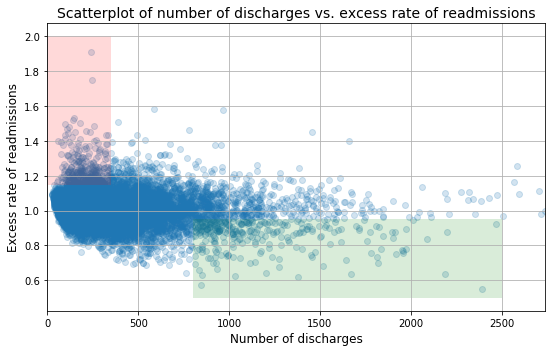

In [4]:
# generate a scatterplot for number of discharges vs. excess rate of readmissions
# lists work better with matplotlib scatterplot function
x = [a for a in clean_hospital_read_df['Number of Discharges'][81:-3]]
y = list(clean_hospital_read_df['Excess Readmission Ratio'][81:-3])

fig, ax = plt.subplots(figsize=(8,5))
ax.scatter(x, y,alpha=0.2)

ax.fill_between([0,350], 1.15, 2, facecolor='red', alpha = .15, interpolate=True)
ax.fill_between([800,2500], .5, .95, facecolor='green', alpha = .15, interpolate=True)

ax.set_xlim([0, max(x)])
ax.set_xlabel('Number of discharges', fontsize=12)
ax.set_ylabel('Excess rate of readmissions', fontsize=12)
ax.set_title('Scatterplot of number of discharges vs. excess rate of readmissions', fontsize=14)

ax.grid(True)
fig.tight_layout()

****

## Preliminary Report

Read the following results/report. While you are reading it, think about if the conclusions are correct, incorrect, misleading or unfounded. Think about what you would change or what additional analyses you would perform.

**A. Initial observations based on the plot above**
+ Overall, rate of readmissions is trending down with increasing number of discharges
+ With lower number of discharges, there is a greater incidence of excess rate of readmissions (area shaded red)
+ With higher number of discharges, there is a greater incidence of lower rates of readmissions (area shaded green) 

**B. Statistics**
+ In hospitals/facilities with number of discharges < 100, mean excess readmission rate is 1.023 and 63% have excess readmission rate greater than 1 
+ In hospitals/facilities with number of discharges > 1000, mean excess readmission rate is 0.978 and 44% have excess readmission rate greater than 1 

**C. Conclusions**
+ There is a significant correlation between hospital capacity (number of discharges) and readmission rates. 
+ Smaller hospitals/facilities may be lacking necessary resources to ensure quality care and prevent complications that lead to readmissions.

**D. Regulatory policy recommendations**
+ Hospitals/facilties with small capacity (< 300) should be required to demonstrate upgraded resource allocation for quality care to continue operation.
+ Directives and incentives should be provided for consolidation of hospitals and facilities to have a smaller number of them with higher capacity and number of discharges.

****
### Exercise

Include your work on the following **in this notebook and submit to your Github account**. 

A. Do you agree with the above analysis and recommendations? Why or why not?
   
B. Provide support for your arguments and your own recommendations with a statistically sound analysis:

   1. Setup an appropriate hypothesis test.
   2. Compute and report the observed significance value (or p-value).
   3. Report statistical significance for $\alpha$ = .01. 
   4. Discuss statistical significance and practical significance. Do they differ here? How does this change your recommendation to the client?
   5. Look at the scatterplot above. 
      - What are the advantages and disadvantages of using this plot to convey information?
      - Construct another plot that conveys the same information in a more direct manner.



You can compose in notebook cells using Markdown: 
+ In the control panel at the top, choose Cell > Cell Type > Markdown
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet
****

<h2><span style="font-size: 13pt;">A. Assessment of analysis and recommendations</span></h2>
<p>- Initial graphical analysis</p>
<p>The use of a scatter plot for such a large amount of data can be misleading as the pressence of areas in the graph covered by overlapping points makes it impossible to place a line of best fit to the data visually.</p>
<p>Employing a polyfit method, the resulting regression line in black which is at a second degree fit to better fit the data while avoiding overfitting indicates a mostly flat overall trend in the data that may appear visually, the datapoints highlighted in red and green are likely outliers suggesting the excess rate of admissions is likely mostly unafected by the number of discharges.</p>

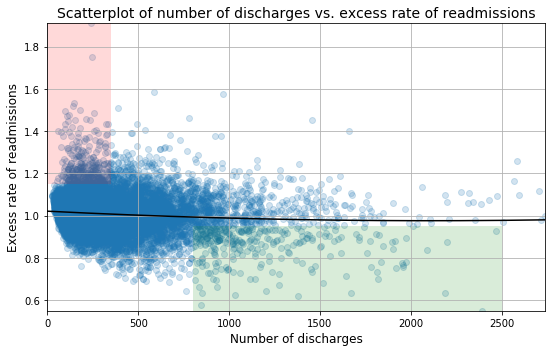

In [5]:
# generate a scatterplot for number of discharges vs. excess rate of readmissions
# lists work better with matplotlib scatterplot function
x = [a for a in clean_hospital_read_df['Number of Discharges'][81:-3]]
y = list(clean_hospital_read_df['Excess Readmission Ratio'][81:-3])

fig, ax = plt.subplots(figsize=(8,5))
ax.scatter(x, y,alpha=0.2)

ax.fill_between([0,350], 1.15, 2, facecolor='red', alpha = .15, interpolate=True)
ax.fill_between([800,2500], .5, .95, facecolor='green', alpha = .15, interpolate=True)

# Perform a second degree regression using np.polyfit(): a, b
pl3 = np.polyfit(x, y, 2)

p = np.poly1d(pl3)

# Specify slopes to consider: a_vals
xp = np.linspace(0, max(x), max(x)*10)

plt.plot(xp, p(xp), '-', color = 'black')
    
ax.set_xlim([0, max(x)])
ax.set_ylim([min(y), max(y)])
ax.set_xlabel('Number of discharges', fontsize=12)
ax.set_ylabel('Excess rate of readmissions', fontsize=12)
ax.set_title('Scatterplot of number of discharges vs. excess rate of readmissions', fontsize=14)

ax.grid(True)
fig.tight_layout()

<p>We also check if the statements on part B of the report are correct</p>

In [6]:
inf100 = round(np.mean(clean_hospital_read_df[clean_hospital_read_df['Number of Discharges']< 100]['Excess Readmission Ratio']),3)
ab1000 = round(np.mean(clean_hospital_read_df[clean_hospital_read_df['Number of Discharges']> 1000]['Excess Readmission Ratio']),3)
inf100ab1 = round(np.mean(clean_hospital_read_df[clean_hospital_read_df['Number of Discharges']< 100]['Excess Readmission Ratio']>1)*100,0)
ab1000ab1 = round(np.mean(clean_hospital_read_df[clean_hospital_read_df['Number of Discharges']> 1000]['Excess Readmission Ratio']>1)*100,0)
print('In hospitals/facilities with number of discharges < 100, mean excess readmission rate is',inf100,'and', inf100ab1, '% have excess readmission rate greater than 1')
print()
print('In hospitals/facilities with number of discharges > 1000, mean excess readmission rate is',ab1000, 'and', ab1000ab1, '% have excess readmission rate greater than 1')
print()
print('The repport is correct on these statistics on the most part eccept the percentage of hospitals/facilities with number of discharges < 100 that have excess readmission rate greater than 1 is 59% instead of 63%')

In hospitals/facilities with number of discharges < 100, mean excess readmission rate is 1.023 and 59.0 % have excess readmission rate greater than 1

In hospitals/facilities with number of discharges > 1000, mean excess readmission rate is 0.978 and 44.0 % have excess readmission rate greater than 1

The repport is correct on these statistics on the most part eccept the percentage of hospitals/facilities with number of discharges < 100 that have excess readmission rate greater than 1 is 59% instead of 63%


<p>We now check if the statemernts in part C of the repport are correct</p>

In [7]:
print('The correlation rate between number of discharges and number of readmissions is', round(clean_hospital_read_df[['Number of Discharges', 'Number of Readmissions']].corr().iloc[0,1],4), 'thus they are highly correlated')

The correlation rate between number of discharges and number of readmissions is 0.7913 thus they are highly correlated


<p>The problem with this figure is that the number of readmisions and discharges are not independent as obviously a facility with higher capacity would have both higher number of discharges and readmissions.</p>
<p>The more important question is whether the number of discharges correlates with a higher excess readmission rate.</p>

In [8]:
print('The correlation rate between number of discharges and excess rate of readmissions is', round(clean_hospital_read_df[['Number of Discharges', 'Excess Readmission Ratio']].corr().iloc[0,1],4), 'thus they have a very low correlation')

The correlation rate between number of discharges and excess rate of readmissions is -0.0974 thus they have a very low correlation


<p>From what we've observed so far there isn't enough evidence to come to a conclusion until we make some formal hypothesis testing.</p>
<p>We will also abstain to any regulatory recommendations until we have better evidence for our conclusion.</p>
<br>
<h2><span style="font-size: 13pt;">B. Provide support for your arguments and your own recommendations with a statistically sound analysis:</span></h2>
<p>1. We set up the appropriate hypothesis test</p>
<p>The key issue to determine in this problem is whether size of a facility, affects the excess rate of total discharges in a significant rate, we will explore the distribution of the facilities by number of discharges by plotting the boxplot.</p>

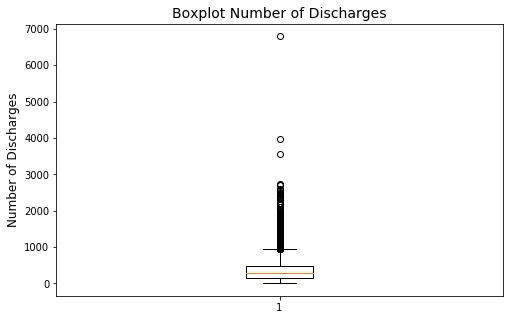

There are 546 facilities with over 946.0 discharges, comprising 17.0 percent of total discharges while making up 5.0 percent of the number of facilities.


In [9]:
# We calculate the interquartile rate to marc the start of the upper outliers
iqr = np.percentile(clean_hospital_read_df['Number of Discharges'],75) - np.percentile(clean_hospital_read_df['Number of Discharges'],25)
maxwhisc = np.percentile(clean_hospital_read_df['Number of Discharges'],75) + 1.5*iqr
# We plot the boxplot
fig, ax = plt.subplots(figsize=(8,5))
plt.boxplot(clean_hospital_read_df['Number of Discharges'])
ax.set_ylabel('Number of Discharges', fontsize=12)
ax.set_title('Boxplot Number of Discharges', fontsize=14)
plt.show()
print('There are', len(clean_hospital_read_df[clean_hospital_read_df['Number of Discharges'] > maxwhisc]['Number of Discharges']), 'facilities with over',round(maxwhisc,0)  ,'discharges, comprising', round(sum(clean_hospital_read_df[clean_hospital_read_df['Number of Discharges'] > maxwhisc]['Number of Discharges'])/sum(clean_hospital_read_df['Number of Discharges'])*100,0), 'percent of total discharges while making up', round(len(clean_hospital_read_df[clean_hospital_read_df['Number of Discharges'] > maxwhisc]['Number of Discharges'])/len(clean_hospital_read_df['Number of Discharges'])*100,0), 'percent of the number of facilities.')

<p>Those outliers that appear on the scatter plot to show excess readimission rates that are better than the average make up an important protion of the total capacity.</p>

In [10]:
print('The scatterplot also shows a high number of outliers with a high excess rate of readmission for facilities with number of discharges below the mean of', round(np.mean(clean_hospital_read_df['Number of Discharges']),0), 'discharges.')

The scatterplot also shows a high number of outliers with a high excess rate of readmission for facilities with number of discharges below the mean of 363.0 discharges.


<p>Our analysis will test whether the larger facilities perform significantly better than the smaller facilities in terms of their excess readmission rates, the test will be a two-sample hypothesis test would determine if there is a difference significantly large in the excess rate of readmission for facilities above 946 discharges and facilities below the mean of 363 discharges.</p>
<p>2. We now perform the significance test for which we will perform a boostrap approach in order to compensate for the much lower number of samples above 946</p>

In [11]:
# Using the bootstrap approach
def draw_bs_replicates(data, func, size=1):
    """Draw bootstrap replicates."""

    # Initialize array of replicates: bs_replicates
    bs_replicates = np.empty(size)

    # Generate replicates
    for i in range(size):
        bs_replicates[i] = func(np.random.choice(data, size=len(data)))

    return bs_replicates
# we split the two groups in terms of number of discharges discarding null values
over946 = clean_hospital_read_df[clean_hospital_read_df['Number of Discharges'] > 946]['Excess Readmission Ratio'].notnull()
below363 = clean_hospital_read_df[clean_hospital_read_df['Number of Discharges'] < 363]['Excess Readmission Ratio'].notnull()
# we perfom boostrap replicates of the empirical means
mean_ratio = np.mean(clean_hospital_read_df['Excess Readmission Ratio'])
bootstrap_over946 = draw_bs_replicates(over946, np.mean, size=10000)
bootstrap_below363 = draw_bs_replicates(below363, np.mean, size=10000)
# we perform the comparison of the two samples
bootstrap_replicates = np.absolute(bootstrap_over946 - bootstrap_below363)
# we create translated samples that have the same standard deviation but their mean is the same as the mean for the entire population
translated_over946 = over946 - np.mean(over946) + mean_ratio
translated_below363 = below363 - np.mean(below363) + mean_ratio
# we perfom boostrap replicates of the translated sample means
translated_bootstrap_over946 = draw_bs_replicates(translated_over946, np.mean, size=10000)
translated_bootstrap_below363 = draw_bs_replicates(translated_below363, np.mean, size=10000)
translated_bootstrap_replicates = np.absolute(translated_bootstrap_over946 - translated_bootstrap_below363)

p = np.sum(bootstrap_replicates <= translated_bootstrap_replicates) / 10000
print('The p value using the bootstrap approach is', p, 'therefore we reject the null hypothesis and accept the alternative')
print('hypothesis that there is a significant difference between the two groups in terms of rate of excess readmission.')

The p value using the bootstrap approach is 0.0 therefore we reject the null hypothesis and accept the alternative
hypothesis that there is a significant difference between the two groups in terms of rate of excess readmission.


<p>3. Employing the significance level of α  = .01 we see clearly the two samples are statisticaly distinct.</p>
<p>4. Statistical significance in the two sample test we performed determines the chance that the datapoints on the two groups could have come from the same distribution at a certain significance level, in this case 0.01.</p>
<p>Practical significance determines whether the differences between the two groups are significant enough to be meaningful, for that we will employ the Cohen's d test as seen <a href="https://newonlinecourses.science.psu.edu/stat200/lesson/6/6.4">here</a> on the two groups.</p>

In [12]:
# we perform the Cohen's d test on the two samples for which we have to first calculate the pooled standard deviation
poolstd = np.sqrt(((len(over946)-1)*np.var(over946)+(len(below363)-1)*np.var(below363))/(len(over946)+len(below363)-1))
# we now calculate the Cohen's d test
cohend = (np.mean(over946)-np.mean(below363))/poolstd
print('The Cohen d test result is', cohend, 'which is well below 0.2 meaning the difference is of little to no effect.')

The Cohen d test result is 0.109792418115 which is well below 0.2 meaning the difference is of little to no effect.


<p>We can now conclude that the excess readmission rate for smaller facilities below 363 discharges is greater than for the larger facilities above 946 discharges, but not significant enough to recommend consolidation of smaller facilities into larger ones considering the consolidation could lead to other problems like patients having to travel larger distances to get care for just a marginal improvement in the excess readmission rate.</p>
<p>We would recommend on the other hand that smaller facilities below 363 discharges should be required to demonstrate upgraded resource allocation for quality care to continue operation, as stated on the preliminary report as the highest concentration of poorly performing facilities are in that range, as seen on the scatterplot.</p>
<p>5. The problem with a simple scatterplot is that when when we have too many datapoints that concentrate on one part of the range they have a tendency to clump together making it impossible to asses how many datapoints really are in that area, one way we can improve the plot to mitigate that issue is by plotting a linear or polygonal regression as we did before, or to supplement the scatter plot with histograms with ecfs to assess the density of datapoints on each axis, which we will do now.</p>

C:\Users\Joan\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


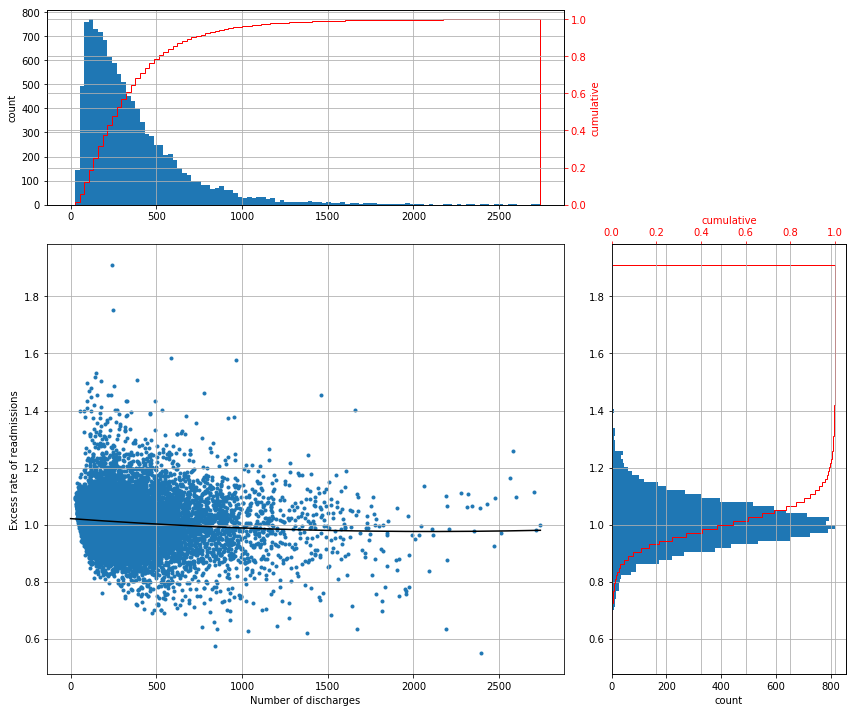

In [13]:
#We clean the data for plotting

import matplotlib.gridspec as gridspec

x = [a for a in clean_hospital_read_df['Number of Discharges'][81:-3]]
y = list(clean_hospital_read_df['Excess Readmission Ratio'][81:-3])

# We create the figure with its three subplots
fig = plt.figure(figsize=(12,10))
gs = gridspec.GridSpec(3, 3)
ax_main = plt.subplot(gs[1:3, :2])
ax_xDist = plt.subplot(gs[0, :2],sharex=ax_main)
ax_yDist = plt.subplot(gs[1:3, 2],sharey=ax_main)

# We plot the main scatterplot
ax_main.scatter(x,y,marker='.')
ax_main.set(xlabel='Number of discharges', ylabel='Excess rate of readmissions')

# Perform a second degree regression using np.polyfit(): a, b
pl3 = np.polyfit(x, y, 2)

p = np.poly1d(pl3)

# Specify slopes to consider: a_vals
xp = np.linspace(0, max(x), max(x)*10)

ax_main.plot(xp, p(xp), '-', color = 'black')

# We plot the histogram and cdf for the x axis
ax_xDist.hist(x,bins=100,align='mid')
ax_xDist.set(ylabel='count')
ax_xCumDist = ax_xDist.twinx()
ax_xCumDist.hist(x,bins=100,cumulative=True,histtype='step',normed=True,color='r',align='mid')
ax_xCumDist.tick_params('y', colors='r')
ax_xCumDist.set_ylabel('cumulative',color='r')

# We plot the histogram and cdf for the y axis
ax_yDist.hist(y,bins=100,orientation='horizontal',align='mid')
ax_yDist.set(xlabel='count')
ax_yCumDist = ax_yDist.twiny()
ax_yCumDist.hist(y,bins=100,cumulative=True,histtype='step',normed=True,color='r',align='mid',orientation='horizontal')
ax_yCumDist.tick_params('x', colors='r')
ax_yCumDist.set_xlabel('cumulative',color='r')

#We add grids to all subplots to increase legibility
ax_main.grid(True)
ax_xDist.grid(True)
ax_yDist.grid(True)
ax_xCumDist.grid(True)
ax_yCumDist.grid(True)

fig.tight_layout()

plt.show()

<p>With this plot we can appreciate much better how right squewed the number of discharges data is while the excess rate of readmissions is mostly normal.</p>

In [14]:
import numpy as np
import scipy as sp
import scipy.stats as stats
import matplotlib.pyplot as plt


%matplotlib inline


def plot_ci_manual(t, s_err, n, x, x2, y2, ax=None):
    """Return an axes of confidence bands using a simple approach.

    Notes
    -----
    .. math:: \left| \: \hat{\mu}_{y|x0} - \mu_{y|x0} \: \right| \; \leq \; T_{n-2}^{.975} \; \hat{\sigma} \; \sqrt{\frac{1}{n}+\frac{(x_0-\bar{x})^2}{\sum_{i=1}^n{(x_i-\bar{x})^2}}}
    .. math:: \hat{\sigma} = \sqrt{\sum_{i=1}^n{\frac{(y_i-\hat{y})^2}{n-2}}}

    References
    ----------
    .. [1] M. Duarte.  "Curve fitting," Jupyter Notebook.
       http://nbviewer.ipython.org/github/demotu/BMC/blob/master/notebooks/CurveFitting.ipynb

    """
    if ax is None:
        ax = plt.gca()

    ci = t*s_err*np.sqrt(1/n + (x2-np.mean(x))**2/np.sum((x-np.mean(x))**2))
    ax.fill_between(x2, y2+ci, y2-ci, color="#b9cfe7", edgecolor="")

    return ax


def plot_ci_bootstrap(xs, ys, resid, nboot=500, ax=None):
    """Return an axes of confidence bands using a bootstrap approach.

    Notes
    -----
    The bootstrap approach iteratively resampling residuals.
    It plots `nboot` number of straight lines and outlines the shape of a band.
    The density of overlapping lines indicates improved confidence.

    Returns
    -------
    ax : axes
        - Cluster of lines
        - Upper and Lower bounds (high and low) (optional)  Note: sensitive to outliers

    References
    ----------
    .. [1] J. Stults. "Visualizing Confidence Intervals", Various Consequences.
       http://www.variousconsequences.com/2010/02/visualizing-confidence-intervals.html

    """ 
    if ax is None:
        ax = plt.gca()

    bootindex = sp.random.randint

    for _ in range(nboot):
        resamp_resid = resid[bootindex(0, len(resid)-1, len(resid))]
        # Make coeffs of for polys
        pc = sp.polyfit(xs, ys + resamp_resid, 1)                   
        # Plot bootstrap cluster
        ax.plot(xs, sp.polyval(pc, xs), "b-", linewidth=2, alpha=3.0/float(nboot))

    return ax

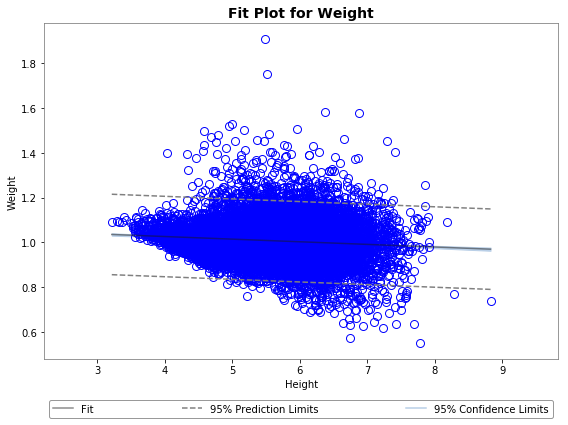

In [15]:
# We have cleaned the data to display on the scatterplot with confidence intervals, we made it at a logarithmic scale to get a
# better picture of the hospital/facilities with lower dispatch rates.
sdf = clean_hospital_read_df[clean_hospital_read_df['Excess Readmission Ratio'].notnull()]
sdf = sdf[sdf['Number of Discharges'].notnull()]
# Computations ----------------------------------------------------------------
# Raw Data
#heights = np.array([50,52,53,54,58,60,62,64,66,67,68,70,72,74,76,55,50,45,65])
#weights = np.array([25,50,55,75,80,85,50,65,85,55,45,45,50,75,95,65,50,40,45])
heights = np.array(np.log(sdf['Number of Discharges']))
weights = np.array(sdf['Excess Readmission Ratio'])


x = heights
y = weights

# Modeling with Numpy
def equation(a, b):
    """Return a 1D polynomial."""
    return np.polyval(a, b) 

p, cov = np.polyfit(x, y, 1, cov=True)                     # parameters and covariance from of the fit of 1-D polynom.
y_model = equation(p, x)                                   # model using the fit parameters; NOTE: parameters here are coefficients

# Statistics
n = x.size                                           # number of observations
m = p.size                                                 # number of parameters
dof = n - m                                                # degrees of freedom
t = stats.t.ppf(0.975, n - m)                              # used for CI and PI bands

# Estimates of Error in Data/Model
resid = y - y_model                           
chi2 = np.sum((resid/y_model)**2)                          # chi-squared; estimates error in data
chi2_red = chi2/(dof)                                      # reduced chi-squared; measures goodness of fit
s_err = np.sqrt(np.sum(resid**2)/(dof))                    # standard deviation of the error


# Plotting --------------------------------------------------------------------
fig, ax = plt.subplots(figsize=(8, 6))

# Data
ax.plot(
    x, y, "o", color="#b9cfe7", markersize=8, 
    markeredgewidth=1, markeredgecolor="b", markerfacecolor="None"
)

# Fit
ax.plot(x,y_model,"-", color="0.1", linewidth=1.5, alpha=0.5, label="Fit")  

x2 = np.linspace(np.min(x), np.max(x), 100)
y2 = equation(p, x2)

# Confidence Interval (select one)
plot_ci_manual(t, s_err, n, x, x2, y2, ax=ax)
#plot_ci_bootstrap(x, y, resid, ax=ax)

# Prediction Interval
pi = t*s_err*np.sqrt(1+1/n+(x2-np.mean(x))**2/np.sum((x-np.mean(x))**2))   
ax.fill_between(x2, y2+pi, y2-pi, color="None", linestyle="--")
ax.plot(x2, y2-pi, "--", color="0.5", label="95% Prediction Limits")
ax.plot(x2, y2+pi, "--", color="0.5")


# Figure Modifications --------------------------------------------------------
# Borders
ax.spines["top"].set_color("0.5")
ax.spines["bottom"].set_color("0.5")
ax.spines["left"].set_color("0.5")
ax.spines["right"].set_color("0.5")
ax.get_xaxis().set_tick_params(direction="out")
ax.get_yaxis().set_tick_params(direction="out")
ax.xaxis.tick_bottom()
ax.yaxis.tick_left() 

# Labels
plt.title("Fit Plot for Weight", fontsize="14", fontweight="bold")
plt.xlabel("Height")
plt.ylabel("Weight")
plt.xlim(np.min(x)-1,np.max(x)+1)

# Custom legend
handles, labels = ax.get_legend_handles_labels()
display = (0, 1)
anyArtist = plt.Line2D((0,1), (0,0), color="#b9cfe7")      # create custom artists
legend = plt.legend(
    [handle for i, handle in enumerate(handles) if i in display] + [anyArtist],
    [label for i, label in enumerate(labels) if i in display] + ["95% Confidence Limits"],
    loc=9, bbox_to_anchor=(0, -0.21, 1., .102), ncol=3, mode="expand"
)  
frame = legend.get_frame().set_edgecolor("0.5")

# Save Figure
plt.tight_layout()
plt.savefig("filename.png", bbox_extra_artists=(legend,), bbox_inches="tight")

plt.show()